In [14]:
%load_ext autoreload
%autoreload 2
from src import quali
from gensim.models import Word2Vec
from gensim.models import FastText
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import statistics

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Captura do vocabulário dos modelos jurídicos

In [3]:
w2v_jur = Word2Vec.load("modelos/w2v_jur.model")
tesauro = pd.read_csv("tesauro_stf.csv")
display(w2v_jur)
display(tesauro.shape)
restricted_word_set = set([c for c, v in w2v_jur.wv.vocab.items()])
display(len(w2v_jur.wv.vocab))

(15795, 8)

39717

### W2V SKIPGRAM 100 NILC

In [4]:
model = KeyedVectors.load_word2vec_format('modelos/w2v_skip_nilc.txt')
tesauro = pd.read_csv("tesauro_stf.csv")
display(model)
display(tesauro.shape)

#removendo os vetores que não estão no vocabulário dos modelos juridicos
model.init_sims()
quali.restrict_w2v(model, restricted_word_set)

display(len(model.wv.vocab))
dfs_w2v_nilc = quali.calcular_desempenho(tesauro, model, 'Word2Vec SKIP NILC')

(15795, 8)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # Remove the CWD from sys.path while we load stuff.


37163

'Rank TSTF Word2Vec SKIP NILC:'

'rank médio use: 1305.171717171717 - rank mediano use: 33 - desvio padrão use: 3986.4232882971214 - total: 99'

'rank médio up: 1294.5757575757575 - rank mediano up: 48 - desvio padrão up: 4224.5999474673345 - total: 99'

'rank médio te: 2361.5774647887324 - rank mediano te: 145 - desvio padrão te: 4874.782227112369 - total: 71'

'rank médio tr: 3025.607881773399 - rank mediano tr: 520.0 - desvio padrão tr: 5719.181354627059 - total: 2030'

'rank médio tg: 2458.450704225352 - rank mediano tg: 153 - desvio padrão tg: 4731.069165749603 - total: 71'

'rank médio podenrado Word2Vec SKIP NILC: 2844.548945147679'

### FTT SKIPGRAM 100 NILC

In [5]:
model = KeyedVectors.load_word2vec_format('modelos/ftt_skip_nilc.txt')
tesauro = pd.read_csv("tesauro_stf.csv")
display(model)
display(tesauro.shape)

#removendo os vetores que não estão no vocabulário dos modelos juridicos
restricted_word_set = set([c for c, v in w2v_jur.wv.vocab.items()])
model.init_sims()
quali.restrict_w2v(model, restricted_word_set)

display(len(model.wv.vocab))
dfs_ftt_nilc = quali.calcular_desempenho(tesauro, model, 'FastText SKIPGRAM NILC')

(15795, 8)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # This is added back by InteractiveShellApp.init_path()


37163

'Rank TSTF FastText SKIPGRAM NILC:'

'rank médio use: 1200.111111111111 - rank mediano use: 15 - desvio padrão use: 4196.176519819862 - total: 99'

'rank médio up: 960.1818181818181 - rank mediano up: 23 - desvio padrão up: 3575.766249732674 - total: 99'

'rank médio te: 2731.3661971830984 - rank mediano te: 123 - desvio padrão te: 5941.5280363590855 - total: 71'

'rank médio tr: 2239.8556650246305 - rank mediano tr: 202.0 - desvio padrão tr: 4745.637704630701 - total: 2030'

'rank médio tg: 1958.7323943661972 - rank mediano tg: 68 - desvio padrão tg: 3931.718838798647 - total: 71'

'rank médio podenrado FastText SKIPGRAM NILC: 2149.271308016878'

### GloVe 100 NILC

In [6]:
model = KeyedVectors.load_word2vec_format('modelos/glove_nilc.txt')
tesauro = pd.read_csv("tesauro_stf.csv")
display(model)
display(tesauro.shape)

#removendo os vetores que não estão no vocabulário dos modelos juridicos
restricted_word_set = set([c for c, v in w2v_jur.wv.vocab.items()])
model.init_sims()
quali.restrict_w2v(model, restricted_word_set)

display(len(model.wv.vocab))
dfs_glv_nilc = quali.calcular_desempenho(tesauro, model, 'GloVe NILC')

(15795, 8)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # This is added back by InteractiveShellApp.init_path()


37163

'Rank TSTF GloVe NILC:'

'rank médio use: 2092.2727272727275 - rank mediano use: 15 - desvio padrão use: 5130.7896452733785 - total: 99'

'rank médio up: 2467.6969696969695 - rank mediano up: 53 - desvio padrão up: 5662.120323721216 - total: 99'

'rank médio te: 2609.2957746478874 - rank mediano te: 351 - desvio padrão te: 4726.101946770467 - total: 71'

'rank médio tr: 3130.285714285714 - rank mediano tr: 353.0 - desvio padrão tr: 6192.1857075279495 - total: 2030'

'rank médio tg: 2213.9718309859154 - rank mediano tg: 185 - desvio padrão tg: 4558.3224168917695 - total: 71'

'rank médio podenrado GloVe NILC: 3016.1894514767932'

## Agora com equivalência no número de termos

#### Word2Vec_jur com vocabulário equivalente

In [7]:
w2v_jur = Word2Vec.load("modelos/w2v_jur.model")
tesauro = pd.read_csv("tesauro_stf.csv")
display(w2v_jur)
display(tesauro.shape)

w2v_jur.wv.save_word2vec_format("modelos/w2v_jur_fmt.model")
w2v_jur = KeyedVectors.load_word2vec_format("modelos/w2v_jur_fmt.model")

w2v_jur.init_sims()
restricted_word_set = set([c for c, v in model.wv.vocab.items()])
quali.restrict_w2v(w2v_jur, restricted_word_set)

display(len(w2v_jur.wv.vocab))
dfs_w2v_jur = quali.calcular_desempenho(tesauro, w2v_jur, 'Word2Vec Jur')

(15795, 8)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  del sys.path[0]


37163

'Rank TSTF Word2Vec Jur:'

'rank médio use: 3179.373737373737 - rank mediano use: 118 - desvio padrão use: 7056.138126259594 - total: 99'

'rank médio up: 3198.191919191919 - rank mediano up: 122 - desvio padrão up: 6826.777707744294 - total: 99'

'rank médio te: 3398.3802816901407 - rank mediano te: 170 - desvio padrão te: 8192.293417537863 - total: 71'

'rank médio tr: 4057.214778325123 - rank mediano tr: 438.0 - desvio padrão tr: 7387.052818726279 - total: 2030'

'rank médio tg: 3495.0 - rank mediano tg: 281 - desvio padrão tg: 7771.814073946957 - total: 71'

'rank médio podenrado Word2Vec Jur: 3948.0822784810125'

#### FastText_Jur com vocabulário equivalente

In [8]:
ftt_jur = KeyedVectors.load("modelos/ftt_jur.model")
tesauro = pd.read_csv("tesauro_stf.csv")
display(ftt_jur)
display(tesauro.shape)

ftt_jur.wv.save_word2vec_format("modelos/ftt_jur_fmt.model")
ftt_jur = KeyedVectors.load_word2vec_format("modelos/ftt_jur_fmt.model")

ftt_jur.init_sims()
restricted_word_set = set([c for c, v in model.wv.vocab.items()])
quali.restrict_w2v(ftt_jur, restricted_word_set)

display(len(ftt_jur.wv.vocab))
dfs_ftt_jur = quali.calcular_desempenho(tesauro, ftt_jur, 'FastText Jur')

(15795, 8)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  del sys.path[0]


37163

'Rank TSTF FastText Jur:'

'rank médio use: 2174.89898989899 - rank mediano use: 29 - desvio padrão use: 5526.072088236519 - total: 99'

'rank médio up: 1770.5656565656566 - rank mediano up: 27 - desvio padrão up: 4452.715248579337 - total: 99'

'rank médio te: 2408.8028169014083 - rank mediano te: 309 - desvio padrão te: 5249.03066866287 - total: 71'

'rank médio tr: 3983.981280788177 - rank mediano tr: 519.5 - desvio padrão tr: 7149.2906075271985 - total: 2030'

'rank médio tg: 2908.6901408450703 - rank mediano tg: 539 - desvio padrão tg: 5609.015461333017 - total: 71'

'rank médio podenrado FastText Jur: 3736.5506329113923'

#### GLoVe_Jur com vocabulário equivalente

In [9]:
glove_file = 'modelos/glove_jur.txt'
tmp_file = get_tmpfile("test_word2vec.txt")
_ = glove2word2vec(glove_file, tmp_file)
glv_jur = KeyedVectors.load_word2vec_format(tmp_file)
tesauro = pd.read_csv("tesauro_stf.csv")
display(glv_jur)
display(tesauro.shape)

glv_jur.init_sims()
restricted_word_set = set([c for c, v in model.wv.vocab.items()])
quali.restrict_w2v(glv_jur, restricted_word_set)

display(len(glv_jur.wv.vocab))
dfs_glv_jur = quali.calcular_desempenho(tesauro, glv_jur, 'GloVe Jur')

(15795, 8)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  del sys.path[0]


37163

'Rank TSTF GloVe Jur:'

'rank médio use: 7931.767676767677 - rank mediano use: 1774 - desvio padrão use: 10927.13471492542 - total: 99'

'rank médio up: 4846.070707070707 - rank mediano up: 499 - desvio padrão up: 8313.96021362413 - total: 99'

'rank médio te: 4865.507042253521 - rank mediano te: 514 - desvio padrão te: 8915.779214200982 - total: 71'

'rank médio tr: 8802.20197044335 - rank mediano tr: 3454.0 - desvio padrão tr: 10824.729714975023 - total: 2030'

'rank médio tg: 8879.633802816901 - rank mediano tg: 2784 - desvio padrão tg: 11946.832601440477 - total: 71'

'rank médio podenrado GloVe Jur: 8484.97088607595'

## Estudo das distribuições de distâncias

### Distribuições W2V Jur

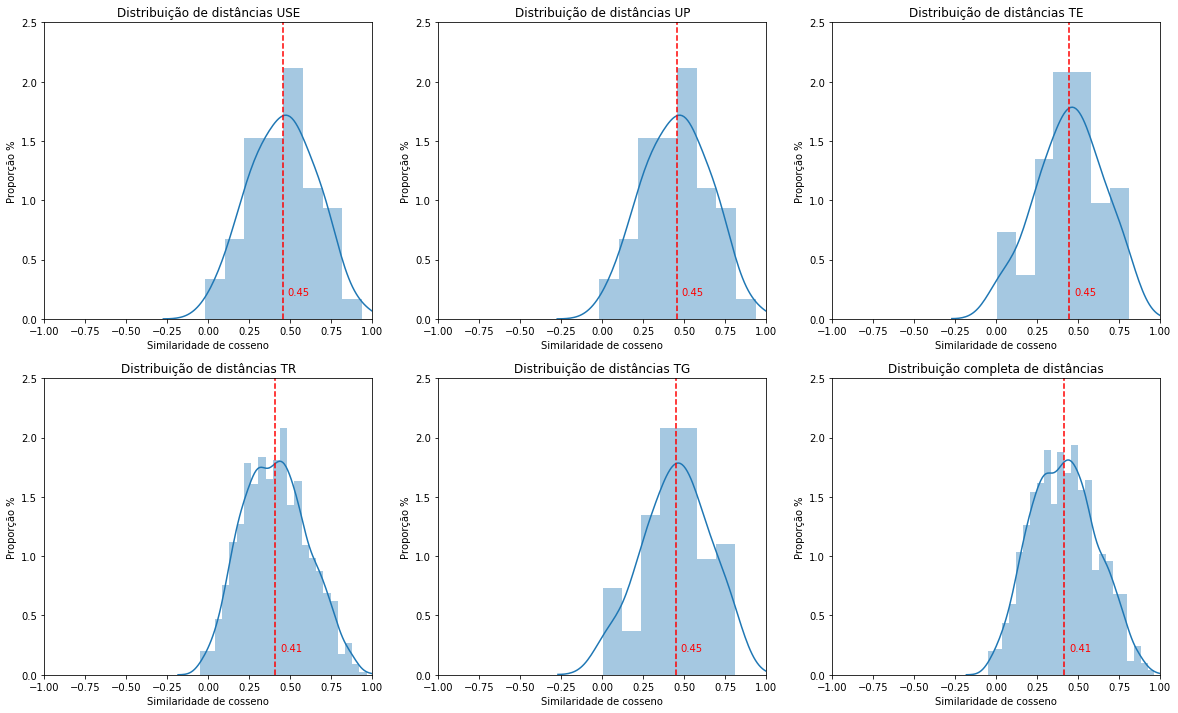

In [85]:
df = dfs_w2v_jur
lista_manipulos = [df[0], df[1],df[2],df[3],df[4]]
quali.plotar_dists(lista_manipulos)

O modelo Word2Vec treinado no domínio jurídico apresentou similaridade de cosseno média de 0,45 para as categorias \textit{USE} , \textit{UP}, \textit{TE} e \textit{TG}, enquanto que a categoria \textit{TR} apresenta 0,41 como média. A distribuição completa, ou seja, sem distinção de categorias, apresenta a mesma média da categoria \textit{TR}.

### Distribuições FTT Jur

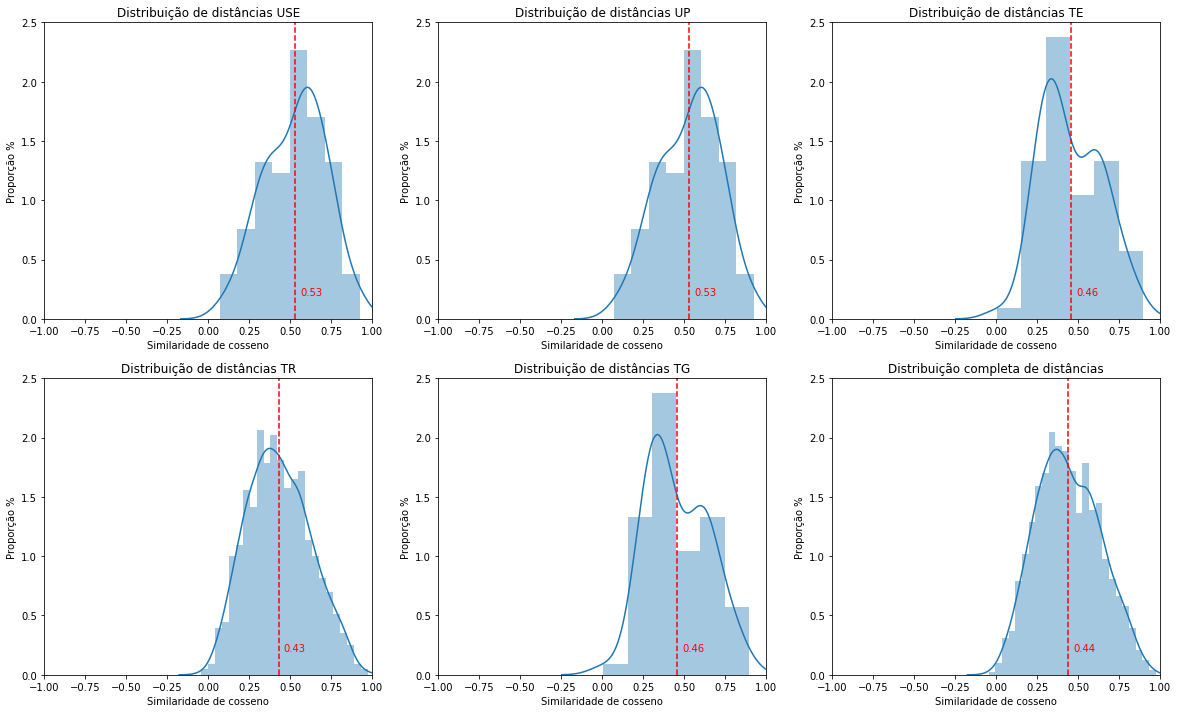

In [86]:
df = dfs_ftt_jur
lista_manipulos = [df[0], df[1],df[2],df[3],df[4]]
quali.plotar_dists(lista_manipulos)

Já o modelo FastText o apresenta as médias de similaridade mais altas dentre os modelos do domínio jurídico: 0,53 para as categorias \textit{USE} e \textit{UP}, 0,46 para as categorias \textit{TE} e \textit{TG}, 0,43 para a categoria \textit{TR} e 0,44 para a média geral de similaridades. 

### Distribuições GLV Jur

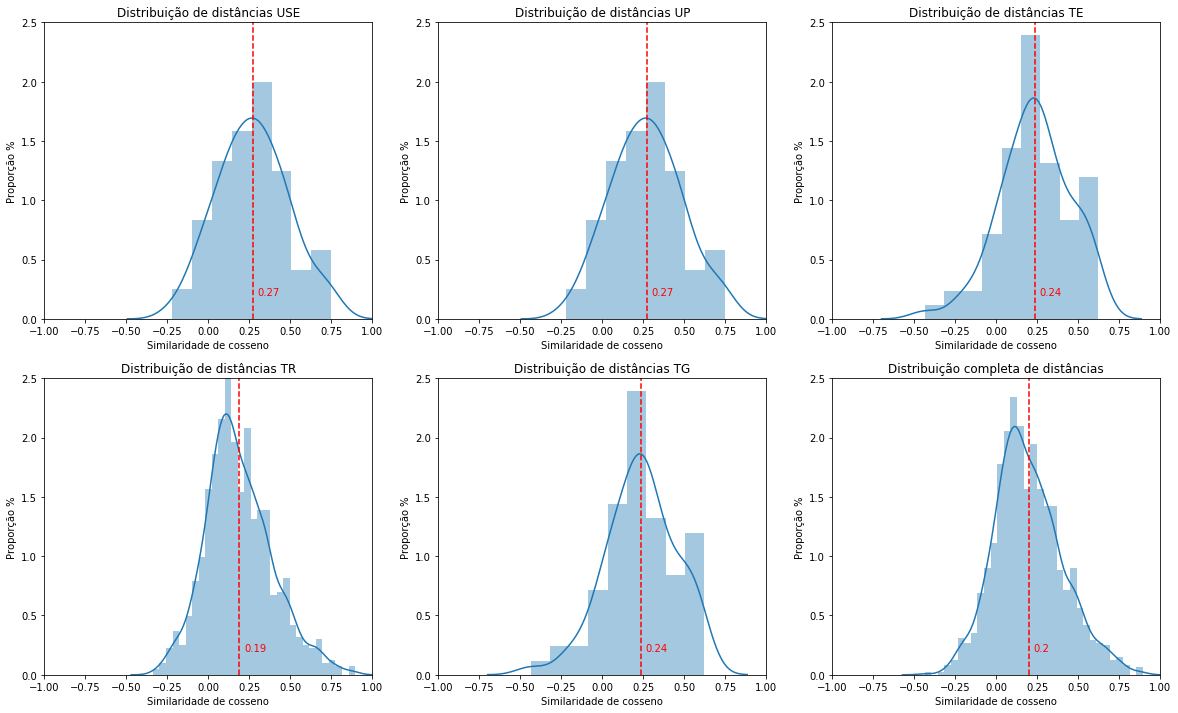

In [87]:
df = dfs_glv_jur
lista_manipulos = [df[0], df[1],df[2],df[3],df[4]]
quali.plotar_dists(lista_manipulos)

O modelo GloVe do domínio jurídico, que apresentou os maiores \textit{rankings} médios dentre todos os modelos avaliados, também apresenta as menores médias de similaridade dentre todos os modelos

### Distribuições W2V Nilc

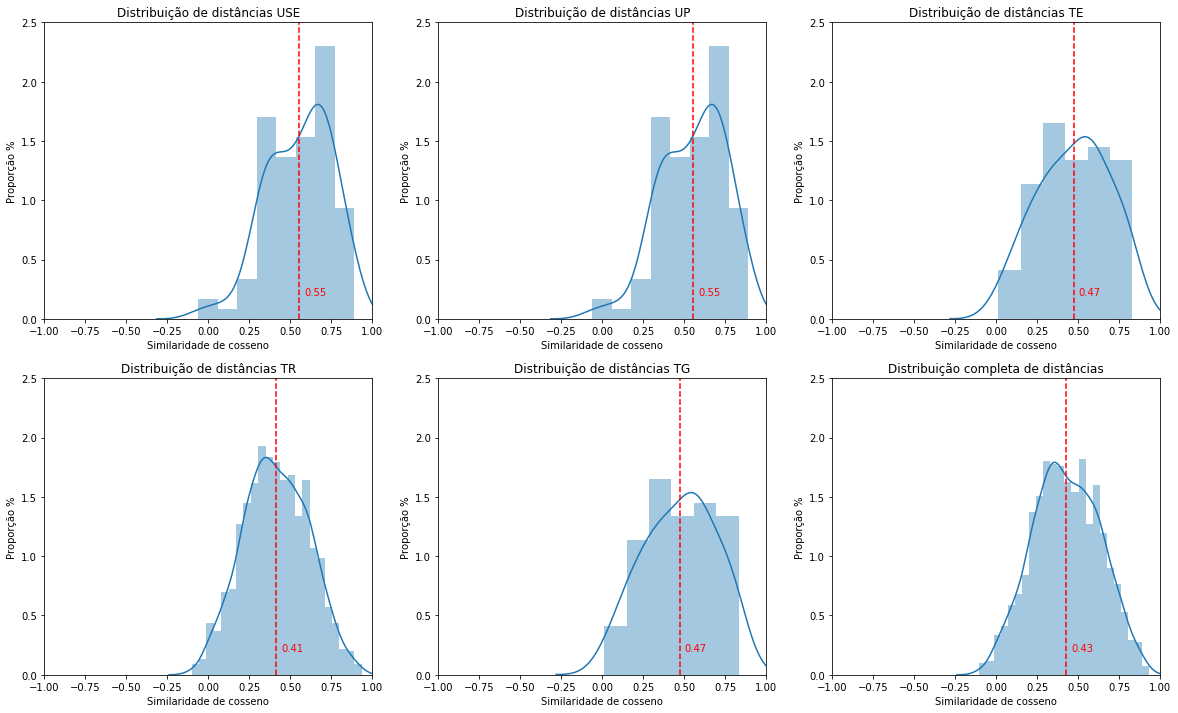

In [88]:
df = dfs_w2v_nilc
lista_manipulos = [df[0], df[1],df[2],df[3],df[4]]
quali.plotar_dists(lista_manipulos)

O modelo Word2Vec do domínio geral apresentou similaridade média geral de 0,43, valor ligeiramente inferior àquela observada no modelo FastText do domínio jurídico. Apesar de ter mostrado médias mariores de similaridade para as categorias \textit{USE} , \textit{UP}, \textit{TE} e \textit{TG}, a média de similaridade observada na categoria \textit{TR}, a mais numerosa, foi 0,41.

### Distribuições FTT Nilc

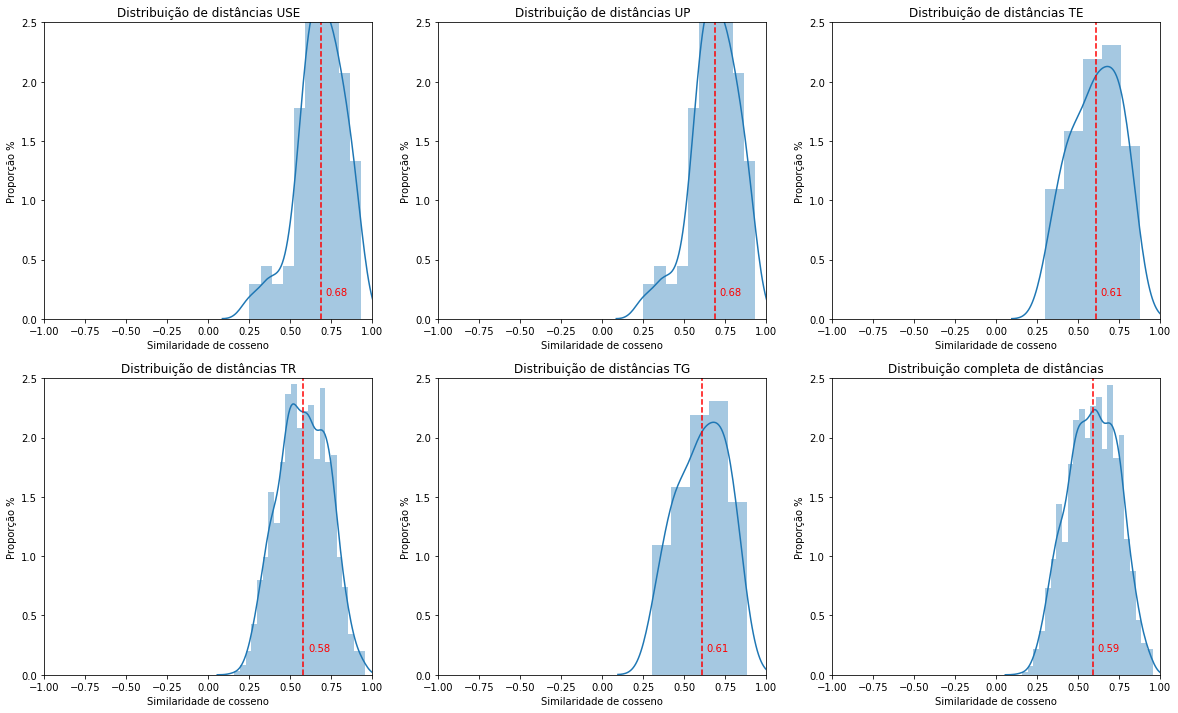

In [89]:
df = dfs_ftt_nilc
lista_manipulos = [df[0], df[1],df[2],df[3],df[4]]
quali.plotar_dists(lista_manipulos)

A técnica FastText gerou o modelo com a maior média em todas as categorias.

### Distribuições GLV Nilc

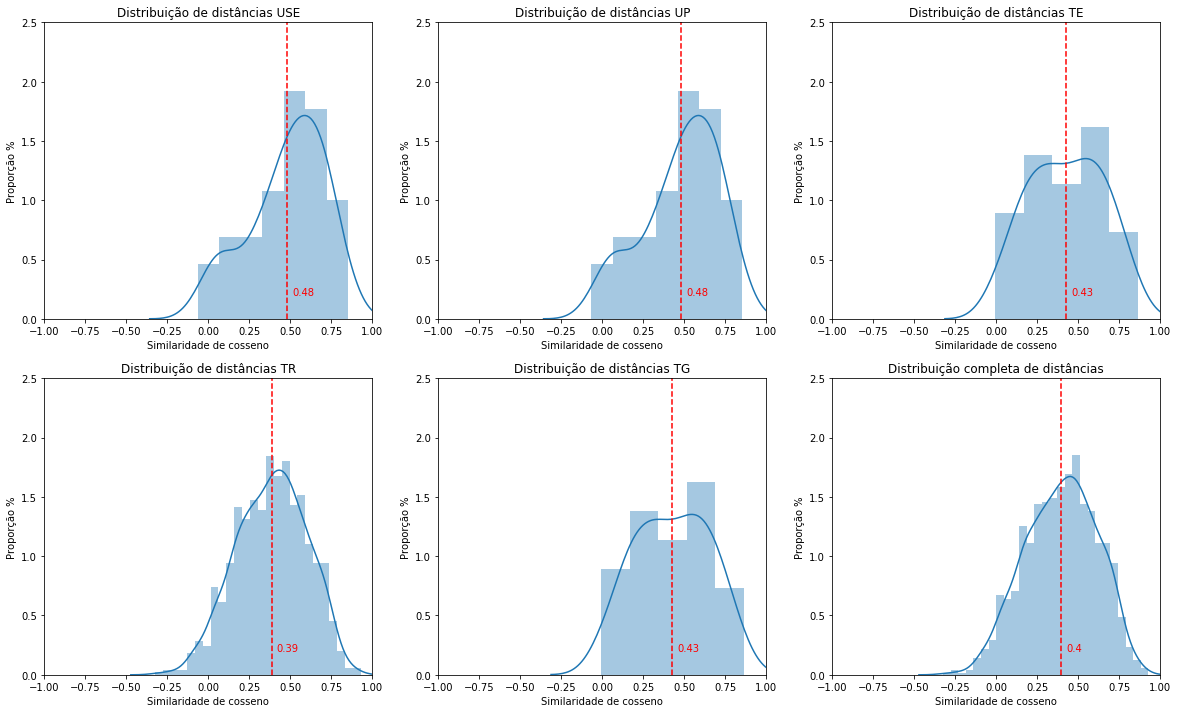

In [90]:
df = dfs_glv_nilc
lista_manipulos = [df[0], df[1],df[2],df[3],df[4]]
quali.plotar_dists(lista_manipulos)

No domínio geral da língua portuguesa, a técnica GloVe proporcionou o modelo com as menores médias de similaridade, sendo 0,48 nas categorias \textit{USE} e \textit{UP}, 0,43 nas categorias \textit{TE} e \textit{TG}, 0,39 na categoria \textit{TR} e 0,4 na distribuição geral. Assim como no domínio jurídico, GloVe é a única técnica que produziu similaridades menores que -0,1.